In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy as sp
import torch
import torchvision
import sklearn as sk
import sklearn.datasets
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load data
data_dir ='drive/MyDrive/Colab Notebooks/'
df_train = pd.read_csv(data_dir + 'train.csv')
df_test = pd.read_csv(data_dir + 'test.csv')

In [ ]:
#df_train[['Image']] 
#splits image and reshape to an array
df_train['splitting_img'] = df_train['Image'].str.split(' ')
img = []
for i in df_train['splitting_img']:
    img.append(np.array(i, dtype=np.float32))
#test
#df_test['Image'] = df_test['Image'].str.split(' ')


In [ ]:
#look for missing values in df_train
df_train.isna().any()
#df_train
df_test.rename(columns = {"Image":"image_values"})

#df_test.drop('Image',inplace=True,axis=1)

,ImageId,image_values
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...
...,...,...
1778,1779,101 101 101 100 100 97 97 98 102 149 214 206 1...
1779,1780,201 191 171 158 145 140 136 130 123 115 108 10...
1780,1781,28 28 29 30 31 32 33 34 39 44 46 46 49 54 61 7...
1781,1782,104 95 71 57 46 52 65 70 70 67 76 72 69 69 72 ...


In [ ]:
#impute missing values with median
df_train.isna().any()
missing_cols = ['left_eye_center_x','left_eye_center_y','right_eye_center_x','right_eye_center_y',            
'left_eye_inner_corner_x',      
'left_eye_inner_corner_y',      
'left_eye_outer_corner_x',      
'left_eye_outer_corner_y',     
'right_eye_inner_corner_x',    
'right_eye_inner_corner_y',   
'right_eye_outer_corner_x', 
'right_eye_outer_corner_y',     
'left_eyebrow_inner_end_x',     
'left_eyebrow_inner_end_y',      
'left_eyebrow_outer_end_x',      
'left_eyebrow_outer_end_y',      
'right_eyebrow_inner_end_x',     
'right_eyebrow_inner_end_y',     
'right_eyebrow_outer_end_x',     
'right_eyebrow_outer_end_y',
'mouth_left_corner_x',           
'mouth_left_corner_y',           
'mouth_right_corner_x',          
'mouth_right_corner_y',         
'mouth_center_top_lip_x',       
'mouth_center_top_lip_y',        
'mouth_center_bottom_lip_x',     
'mouth_center_bottom_lip_y']
for column in missing_cols :

  df_train[column].fillna(df_train[column].median(), inplace = True)

#df_train

In [ ]:
#split train data
df_train, df_val = train_test_split(df_train, test_size=0.25, random_state=1)

In [ ]:
#new array
new_img = []
for i in img:
    new_img.append(i.reshape(96,96))
img_test_new = []
#for i in img_test:
#   new_img_test.append(i.reshape(96,96))

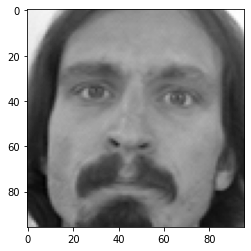

In [ ]:
images = df_train['splitting_img']
plt.imshow(new_img[0],cmap='gray')

In [ ]:
#data augmentation
import albumentations as A

In [ ]:
class FinalDataset(torch.utils.data.Dataset):
  def __init__(self,df):
    self.df =df
  def __len__(self): #Length Method
    return len(self.df)
    
  def __getitem__(self,idx):
    row = self.df.iloc[idx]
    
    y = np.float32(row[0:30].values) 
    x = row['Image'].split(' ')
    x = np.float32(np.array(x)) / 255.0 
    
    #For a CNN, X needs to be a multidimensional array instead of a flat vector in a simple NN
    x = np.reshape(x, (1,96,96)) 

    
    return x,y

In [ ]:
class PretrainedDataset(torch.utils.data.Dataset):
  def __init__(self,df):
    self.df =df
    #data augmemtentation
    self.transform = A.Compose([A.RandomRotate90()])
  def __len__(self): #Length Method
    return len(self.df)
    
  def __getitem__(self,idx):
    row = self.df.iloc[idx]
    
    y = np.float32(row[0:30].values)
    x = row['Image'].split(' ')
    x = np.float32(np.array(x)) / 255.0 
    
    #For a CNN, X needs to be a multidimensional array instead of a flat vector in a simple NN
    x = np.reshape(x, (96,96)) 
    x = np.stack((x,x,x))

    return x,y

In [ ]:

dataset_train= FinalDataset(df_train)
dataset_validation = FinalDataset(df_val)
dataloader_train = torch.utils.data.DataLoader(dataset_train,batch_size=64,shuffle=True)
dataloader_validation = torch.utils.data.DataLoader(dataset_validation,batch_size=64,shuffle=True)
#dataloader_validation

dataset_train_pre = PretrainedDataset(df_train)
dataset_val_pre = PretrainedDataset(df_val)
dataloader_train_pre = torch.utils.data.DataLoader(dataset_train_pre,batch_size=64,shuffle=True)
dataloader_val_pre = torch.utils.data.DataLoader(dataset_val_pre,batch_size=64,shuffle=True)



In [ ]:
X_batch, Y_batch = next(iter(dataloader_train))
#X_batch
#Y_batch
X_batch1, Y_batch1 = next(iter(dataloader_train_pre))
Y_batch1.shape

torch.Size([64, 30])

tensor([63.5614, 36.6532, 27.7781, 37.0320, 55.9881, 37.9787, 71.8920, 37.7893,
        35.5404, 37.7893, 19.4475, 37.2214, 49.7403, 27.3762, 80.9799, 32.6773,
        39.8951, 27.7547, 12.6315, 30.0266, 46.3323, 57.4797, 63.1826, 79.4419,
        30.9966, 80.3886, 46.7111, 76.0339, 46.9002, 83.7966])
tensor([63.5614, 36.6532, 27.7781, 37.0320, 55.9881, 37.9787, 71.8920, 37.7893,
        35.5404, 37.7893, 19.4475, 37.2214, 49.7403, 27.3762, 80.9799, 32.6773,
        39.8951, 27.7547, 12.6315, 30.0266, 46.3323, 57.4797, 63.1826, 79.4419,
        30.9966, 80.3886, 46.7111, 76.0339, 46.9002, 83.7966])
torch.Size([64, 1, 96, 96])


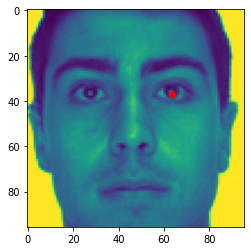

In [ ]:
idx = 2
img = X_batch[idx]
targetvals = Y_batch[idx]
print(Y_batch[2])
print(targetvals)
plt.imshow(np.reshape(X_batch[idx],(96,96)))
plt.scatter(targetvals[0],targetvals[1],color='red')
print(X_batch.shape)

In [ ]:

class CNN(torch.nn.Module):
    def __init__(self):
      super(CNN, self).__init__()
      #convolutional 2d 
      #input to convolution + reLU to max pooling to convolution + ReLU again and pooling again then fully connected. 
      self.layers = torch.nn.Sequential(
          torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
          torch.nn.BatchNorm2d(32),
          torch.nn.ReLU(inplace=True),
          torch.nn.MaxPool2d(kernel_size=2, stride=2),
          # Defining another 2D convolution layer
          torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
          torch.nn.BatchNorm2d(64),
          torch.nn.ReLU(inplace=True),
          torch.nn.MaxPool2d(kernel_size=2, stride=2),
      )
      self.linear_layers = torch.nn.Sequential(
            torch.nn.Linear(36864, 30)
        )
    # Defining the forward pass    
    def forward(self, x):
        x = self.layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)

        return x


In [ ]:
model = CNN()
model

CNN(
  (layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=36864, out_features=30, bias=True)
  )
)

In [ ]:

device = torch.device('cpu')
model = model.to(device)

In [ ]:
loss_fun = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)
#model

In [ ]:
num_epochs= 10 
N_train = len(dataset_train)
N_test = len(dataset_validation)
train_losses = []
test_losses = []

In [ ]:
for ep in range(num_epochs):
    model.train() #put model behavior on train mode. this turns on any model behavior that should only occur during training
    train_loss = 0.0
    batch_idx = 0
    
    for X_batch,Y_batch in dataloader_train:
        
        X_batch = X_batch.to(device) #if device is a GPU, this puts the current batch of data on the GPU
        Y_batch = Y_batch.to(device)
        
        N_batch = X_batch.shape[0]
        outputs = model(X_batch)
        m = torch.nn.LogSoftmax(dim=1)
        input = torch.randn(3, 5, requires_grad=True)
        target = torch.tensor([1, 0, 4])
        #loss_oneBatch = loss_fun(m(input), target)
        loss_oneBatch = loss_fun(outputs,Y_batch)
        
        model.zero_grad()
        loss_oneBatch.backward() #pytorch computes the gradient for us
        optimizer.step() #one iteration of stochastic gradient descent
        
        train_loss += loss_oneBatch * N_batch
        
    model.eval() #put model in eval mode. turns off any model behavior that should only occur during training 
    test_loss = 0.0
    for X_batch, Y_batch in dataloader_validation:
        X_batch = X_batch.to(device)
        Y_batch = Y_batch.to(device)
        with torch.no_grad(): #tells pytorch that it doesnt need to keep track of gradient info
            N_batch =X_batch.shape[0]
            outputs = model(X_batch)
            loss_oneBatch = loss_fun(outputs,Y_batch)
            test_loss += loss_oneBatch * N_batch
    train_losses.append(train_loss/N_train)
    test_losses.append(test_loss/N_test)
    print('epoch: ', ep , 'train loss: ', train_loss/N_train, 'validation loss',test_loss/N_test)
#train_losses
        

epoch:  0 train loss:  tensor(98.6318, grad_fn=<DivBackward0>) validation loss tensor(10.4535)
epoch:  1 train loss:  tensor(8.9773, grad_fn=<DivBackward0>) validation loss tensor(9.4651)
epoch:  2 train loss:  tensor(7.7974, grad_fn=<DivBackward0>) validation loss tensor(8.0426)
epoch:  3 train loss:  tensor(7.1127, grad_fn=<DivBackward0>) validation loss tensor(9.7346)
epoch:  4 train loss:  tensor(6.9320, grad_fn=<DivBackward0>) validation loss tensor(7.7889)
epoch:  5 train loss:  tensor(6.3715, grad_fn=<DivBackward0>) validation loss tensor(10.2756)
epoch:  6 train loss:  tensor(6.1347, grad_fn=<DivBackward0>) validation loss tensor(9.2935)
epoch:  7 train loss:  tensor(6.2658, grad_fn=<DivBackward0>) validation loss tensor(6.3828)
epoch:  8 train loss:  tensor(5.2762, grad_fn=<DivBackward0>) validation loss tensor(8.0873)
epoch:  9 train loss:  tensor(5.3852, grad_fn=<DivBackward0>) validation loss tensor(6.0725)


Text(0.5, 1.0, 'Objective Function vs Epoch')

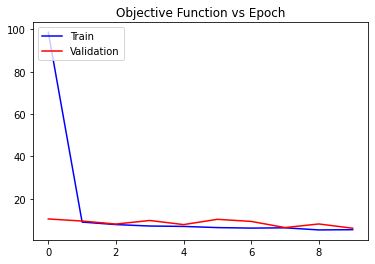

In [205]:
plt.plot(train_losses,color = 'blue', label = 'Train')
plt.plot(test_losses,color = 'red', label = 'Validation')
plt.legend(loc='upper left')
plt.title('Objective Function vs Epoch')

In [216]:
X_val , Y_val = next(iter(dataloader_validation))

X_val = X_val.to(device)
Y_val = Y_val.to(device)

with torch.no_grad(): #Tells pyTorch that it does not need to keep track of gradient info
    N_batch = X_val.shape[0]
    outputs = model(X_val) #Predictions 

outputs = outputs.cpu()

img_val = X_val[0].cpu().numpy()
validation_target_vals = outputs[0]
target_test = Y_batch[0]
#len(outputs)

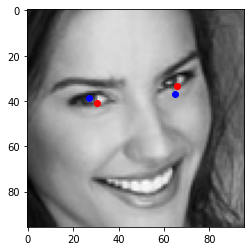

In [217]:
plt.imshow(img_val[0], cmap='gray')
plt.scatter(validation_target_vals[0],validation_target_vals[1], color='red')
plt.scatter(target_test[0],target_test[1],color='blue')
plt.scatter(validation_target_vals[2],validation_target_vals[3], color='red')
plt.scatter(target_test[2],target_test[3],color='blue')

In [279]:
outputs.shape

(35, 30)

In [281]:
id_lookup = pd.read_csv(data_dir + 'IdLookupTable.csv')
feature_names = list(id_lookup['FeatureName'])
image_ids = list(id_lookup['ImageId']-1)
row_ids = list(id_lookup['RowId'])
feature_list = []
for feature in feature_names:
    feature_list.append(feature_names.index(feature))
    
predictions = []
for x,y in zip(image_ids, feature_list):
    predictions.append(outputs[y])

row_ids = pd.Series(row_ids, name = 'RowId')
locations = pd.Series(predictions, name = 'Location')

df_out = pd.concat([row_ids,locations],axis = 1)
df_out['Location'] = df_out['Location'] / 255

df_out.to_csv(data_dir + 'kaggle.csv',index = False)


## Different Models + Data Augmentation

In [218]:
import torchvision.models as models

In [219]:
model1 = torchvision.models.resnet18(pretrained =True)
model1.fc=torch.nn.Linear(512,30)
#model1
model1.to(device)
loss_fun = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.005) 
num_epochs= 5
N_train1 = len(dataset_train_pre)
N_test1 = len(dataset_val_pre)
train_losses1 = []

test_losses1 = []
#model1

In [220]:
for ep in range(num_epochs):
  model1.train() #put model behavior on train mode. this turns on any model behavior that should only occur during training
  train_loss = 0.0
  batch_idx = 0
    
  for X_batch,Y_batch in dataloader_train_pre:
    X_batch = X_batch.to(device) #if device is a GPU, this puts the current batch of data on the GPU
    Y_batch = Y_batch.to(device)
        
    N_batch = X_batch.shape[0]
    outputs = model1(X_batch)

    
    loss_oneBatch = loss_fun(outputs,Y_batch)
        
    model1.zero_grad()
    loss_oneBatch.backward() #pytorch computes the gradient for us
    optimizer.step() #one iteration of stochastic gradient descent
    
    train_loss += loss_oneBatch * N_batch
  model1.eval() #put model in eval mode. turns off any model behavior that should only occur during training 
  test_loss = 0.0
  for X_batch, Y_batch in dataloader_val_pre:
    X_batch = X_batch.to(device)
    Y_batch = Y_batch.to(device)
    with torch.no_grad(): #tells pytorch that it doesnt need to keep track of gradient info
      N_batch =X_batch.shape[0]
      outputs = model1(X_batch)
      loss_oneBatch = loss_fun(outputs,Y_batch)
      test_loss += loss_oneBatch * N_batch
  train_losses1.append(train_loss/N_train1)
  test_losses1.append(test_loss/N_test1)
  print('epoch: ', ep , 'train loss: ', train_loss/N_train1, 'validation loss',test_loss/N_test1)

epoch:  0 train loss:  tensor(2625.3635, grad_fn=<DivBackward0>) validation loss tensor(2633.5891)
epoch:  1 train loss:  tensor(2625.3694, grad_fn=<DivBackward0>) validation loss tensor(2628.7271)
epoch:  2 train loss:  tensor(2625.3711, grad_fn=<DivBackward0>) validation loss tensor(2628.0688)
epoch:  3 train loss:  tensor(2625.3811, grad_fn=<DivBackward0>) validation loss tensor(2628.9705)
epoch:  4 train loss:  tensor(2625.3804, grad_fn=<DivBackward0>) validation loss tensor(2628.7100)


Text(0.5, 1.0, 'Objective Function vs Epoch')

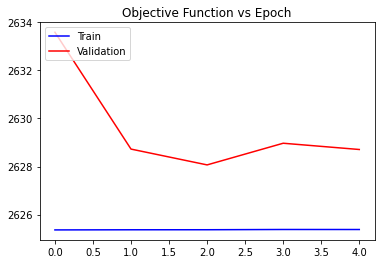

In [223]:
plt.plot(train_losses1,color = 'blue', label = 'Train')
plt.plot(test_losses1,color = 'red', label = 'Validation')
plt.legend(loc='upper left')
plt.title('Objective Function vs Epoch')

In [222]:
X_val1 , Y_val1 = next(iter(dataloader_val_pre))

X_val1 = X_val1.to(device)
Y_val1 = Y_val1.to(device)

with torch.no_grad(): #Tells pyTorch that it does not need to keep track of gradient info
    N_batch = X_val1.shape[0]
    outputs = model(X_val1) #Predictions 

outputs = outputs.cpu()

img_val1 = X_val1[0].cpu().numpy()
validation_target_vals1 = outputs[0]
target_test1 = Y_batch[0]

RuntimeError: ignored

In [ ]:
plt.imshow(img_val1[0], cmap='gray')
plt.scatter(validation_target_vals1[0],validation_target_vals1[1], color='red')
plt.scatter(target_test1[0],target_test1[1],color='blue')
plt.scatter(validation_target_vals1[2],validation_target_vals1[3], color='red')
plt.scatter(target_test1[2],target_test1[3],color='blue')

#Resnet No Augmentation

In [ ]:
class resnetDataset(torch.utils.data.Dataset):
  def __init__(self,df):
    self.df =df
  def __len__(self): #Length Method
    return len(self.df)
    
  def __getitem__(self,idx):
    row = self.df.iloc[idx]
    
    y = np.float32(row[0:30].values)
    x = row['Image'].split(' ')
    x = np.float32(np.array(x)) / 255.0 
    
    #For a CNN, X needs to be a multidimensional array instead of a flat vector in a simple NN
    x = np.reshape(x, (96,96)) 
    x = np.stack((x,x,x))

    return x,y

In [ ]:
dataset_train_res = resnetDataset(df_train)
dataset_val_res = resnetDataset(df_val)
dataloader_train_res = torch.utils.data.DataLoader(dataset_train_res,batch_size=64,shuffle=True)
dataloader_val_res = torch.utils.data.DataLoader(dataset_val_res,batch_size=64,shuffle=True)

In [ ]:
X_batch2, Y_batch2 = next(iter(dataloader_train_res))
optimizer2 = torch.optim.Adam(model.parameters(),lr = 0.01) 

In [ ]:
for ep in range(5):
  model1.train() #put model behavior on train mode. this turns on any model behavior that should only occur during training
  train_loss = 0.0
  batch_idx = 0
    
  for X_batch,Y_batch in dataloader_train_res:
    X_batch = X_batch.to(device) #if device is a GPU, this puts the current batch of data on the GPU
    Y_batch = Y_batch.to(device)
        
    N_batch = X_batch.shape[0]
    outputs = model1(X_batch)

    
    loss_oneBatch = loss_fun(outputs,Y_batch)
        
    model1.zero_grad()
    loss_oneBatch.backward() #pytorch computes the gradient for us
    optimizer2.step() #one iteration of stochastic gradient descent
    
    train_loss += loss_oneBatch * N_batch
  model1.eval() #put model in eval mode. turns off any model behavior that should only occur during training 
  test_loss = 0.0
  for X_batch, Y_batch in dataloader_val_res:
    X_batch = X_batch.to(device)
    Y_batch = Y_batch.to(device)
    with torch.no_grad(): #tells pytorch that it doesnt need to keep track of gradient info
      N_batch =X_batch.shape[0]
      outputs = model1(X_batch)
      loss_oneBatch = loss_fun(outputs,Y_batch)
      test_loss += loss_oneBatch * N_batch
  train_losses1.append(train_loss/N_train1)
  test_losses1.append(test_loss/N_test1)
  print('epoch: ', ep , 'train loss: ', train_loss/N_train1, 'validation loss',test_loss/N_test1)

epoch:  0 train loss:  tensor(2627.2087, grad_fn=<DivBackward0>) validation loss tensor(2630.0264)
epoch:  1 train loss:  tensor(2627.1821, grad_fn=<DivBackward0>) validation loss tensor(2630.4067)
epoch:  2 train loss:  tensor(2627.1765, grad_fn=<DivBackward0>) validation loss tensor(2630.4143)
epoch:  3 train loss:  tensor(2627.1946, grad_fn=<DivBackward0>) validation loss tensor(2630.4949)
epoch:  4 train loss:  tensor(2627.2109, grad_fn=<DivBackward0>) validation loss tensor(2629.9958)


Text(0.5, 1.0, 'Objective Function vs Epoch')

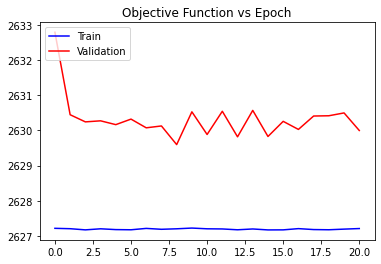

In [ ]:
plt.plot(train_losses1,color = 'blue', label = 'Train')
plt.plot(test_losses1,color = 'red', label = 'Validation')
plt.legend(loc='upper left')
plt.title('Objective Function vs Epoch')

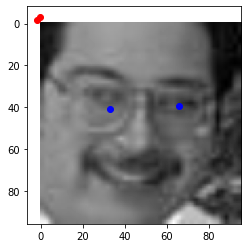

In [ ]:
plt.imshow(img_val1[0], cmap='gray')
plt.scatter(validation_target_vals1[0],validation_target_vals1[1], color='red')
plt.scatter(target_test1[0],target_test1[1],color='blue')
plt.scatter(validation_target_vals1[2],validation_target_vals1[3], color='red')
plt.scatter(target_test1[2],target_test1[3],color='blue')

# Submission to Kaggle